# 1. Install Dependencies and Setup

In [1]:
# !pip install tensorflow opencv-python 
# tensorflow-gpu matplotlib

In [2]:
import os
import cv2
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Load Data

### 2.1 Load Images

In [4]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [5]:
train_images = tf.data.Dataset.list_files('data\\train_aug\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (250,250)))
train_images = train_images.map(lambda x: x/255)

In [6]:
test_images = tf.data.Dataset.list_files('data\\test_aug\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (250,250)))
test_images = test_images.map(lambda x: x/255)

In [7]:
val_images = tf.data.Dataset.list_files('data\\val_aug\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (250,250)))
val_images = val_images.map(lambda x: x/255)

### 2.2 Prepare Labels

In [8]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
    return [label['keypoints']]

In [9]:
train_labels = tf.data.Dataset.list_files('data\\train_aug\\labels\\*.json', shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [10]:
train_labels.as_numpy_iterator().next()
# x left eye, y left eye, x right eye, y right eye

(array([0.651 , 0.381 , 0.4421, 0.3823], dtype=float16),)

In [11]:
test_labels = tf.data.Dataset.list_files('data\\test_aug\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [12]:
val_labels = tf.data.Dataset.list_files('data\\val_aug\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

### 2.3. Combine Labels and Images

In [13]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(16)
train = train.prefetch(4)

In [14]:
train.as_numpy_iterator().next()

(array([[[[0.14282352, 0.14282352, 0.1820392 ],
          [0.14117648, 0.14117648, 0.17254902],
          [0.14509805, 0.14117648, 0.17254902],
          ...,
          [0.2803137 , 0.40894112, 0.678745  ],
          [0.29623562, 0.42956895, 0.7114937 ],
          [0.32737288, 0.46854937, 0.75874543]],
 
         [[0.14184001, 0.14184001, 0.17321256],
          [0.14042196, 0.14042196, 0.1717945 ],
          [0.14117648, 0.14117648, 0.17275295],
          ...,
          [0.27411762, 0.40274504, 0.672345  ],
          [0.29132414, 0.4243924 , 0.7057258 ],
          [0.3319219 , 0.46525523, 0.7554513 ]],
 
         [[0.13372548, 0.14549018, 0.16509803],
          [0.14156862, 0.14156862, 0.17294116],
          [0.14192156, 0.14192156, 0.18121569],
          ...,
          [0.2787843 , 0.40670583, 0.67501944],
          [0.29145122, 0.42086297, 0.6990905 ],
          [0.31844732, 0.45178065, 0.7341336 ]],
 
         ...,
 
         [[0.9074589 , 0.8177883 , 0.8163059 ],
          [0.90119

In [15]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(16)
test = test.prefetch(4)

In [16]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(16)
val = val.prefetch(4)

### 2.4 View Samples

In [71]:
data_samples = train.as_numpy_iterator()

In [72]:
res = data_samples.next()

In [73]:
res

(array([[[[0.56078434, 0.61960787, 0.6       ],
          [0.56078434, 0.61960787, 0.6       ],
          [0.56509805, 0.6239216 , 0.60431373],
          ...,
          [0.6006275 , 0.6202353 , 0.60454905],
          [0.607807  , 0.62349325, 0.6195717 ],
          [0.6032941 , 0.62682354, 0.61898035]],
 
         [[0.56121254, 0.62003607, 0.5925851 ],
          [0.5647059 , 0.62352943, 0.59607846],
          [0.56601566, 0.6248392 , 0.5973882 ],
          ...,
          [0.6020627 , 0.62167054, 0.6059843 ],
          [0.6016174 , 0.61730367, 0.6133821 ],
          [0.6090259 , 0.62471217, 0.6207906 ]],
 
         [[0.57027453, 0.6212549 , 0.59380394],
          [0.575451  , 0.6264314 , 0.5989804 ],
          [0.57254905, 0.62352943, 0.59607846],
          ...,
          [0.57215685, 0.5878431 , 0.58392155],
          [0.58894134, 0.6046276 , 0.60070604],
          [0.60729426, 0.62298054, 0.61905897]],
 
         ...,
 
         [[0.45944318, 0.5143451 , 0.5182667 ],
          [0.45286

In [74]:
res[0].shape

(16, 250, 250, 3)

In [75]:
np.multiply(res[1][0][0], [250, 250, 250, 250])

array([  0.        ,   0.        , 137.32910156, 108.3984375 ])

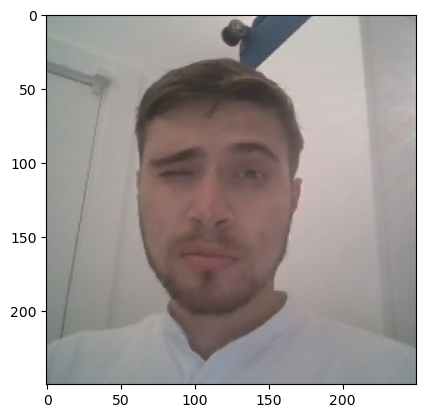

In [76]:
plt.imshow(res[0][0]);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


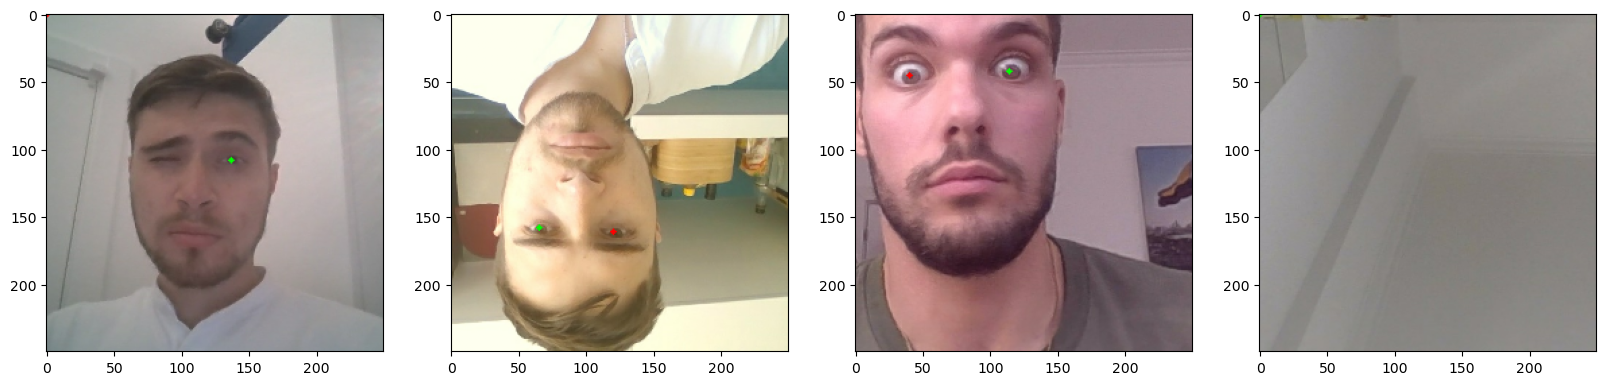

In [77]:
# sample_image_writable = res.copy()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx].copy()
    sample_coords = res[1][0][idx]
    
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[:2], [250,250]).astype(int)), 2, (255,0,0), -1)
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[2:], [250,250]).astype(int)), 2, (0,255,0), -1)
    
    ax[idx].imshow(sample_image)

# 3. Build Model

### 3.1 Create Neural Network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Reshape, Dropout
from tensorflow.keras.applications import ResNet152V2

In [29]:
model = Sequential([
    Input(shape=(250,250,3)), 
    ResNet152V2(include_top=False, input_shape=(250,250,3)),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(256, 3, 2, padding='same', activation='relu'),
    Conv2D(256, 2, 2, activation='relu'),
    Dropout(0.05),
    Conv2D(4, 2, 2),
    Reshape((4,))
])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ (None, 8, 8, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 8, 8, 512)      │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 1, 4)        │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,575,556 (273.04 MB)

 Trainable params: 71,431,812 (272.49 MB)

 Non-trainable params: 143,744 (561.50 KB)

### 3.2 Setup Losses and Optimizer

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0007)
loss = tf.keras.losses.MeanSquaredError()

C:\Users\luis.penteado_ifood\anaconda3\envs\da2324a\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [32]:
model.compile(optimizer, loss)

### 3.3 Sense Check predictions

In [33]:
X, y = train.as_numpy_iterator().next()

In [34]:
X.shape

(16, 250, 250, 3)

In [35]:
scores = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [36]:
scores

array([[-0.31882626,  0.01343021,  1.5414901 , -0.4464575 ],
       [-0.3902626 ,  0.0333178 ,  0.80394214, -0.87827367],
       [-0.03401981, -0.2288329 ,  0.61171097, -0.20840017],
       [-0.54582304, -0.33423832,  1.0476751 , -0.10019706],
       [-1.2150917 , -1.095908  ,  1.9484609 , -0.8248813 ],
       [-0.10623302, -0.66968083,  1.6104515 , -0.9524704 ],
       [-0.9666986 ,  0.2860961 ,  0.9360283 , -0.7498276 ],
       [-0.5796632 , -0.31978872,  0.77506757, -0.41181114],
       [-0.91122824, -0.28746247,  0.86681086, -1.482442  ],
       [-0.07298961, -0.8339887 ,  1.5193101 , -0.4391226 ],
       [-0.15172109, -0.38945037,  1.939503  , -0.24675678],
       [-0.14641376, -0.12101342,  1.2314389 ,  0.00197469],
       [-1.453701  , -0.28236338,  0.9716634 , -0.7727134 ],
       [-0.2939636 , -0.75283617,  1.4652408 , -0.45006716],
       [-1.1247534 , -0.51783806,  1.7726591 , -0.3902371 ],
       [-0.09438884, -0.39595094,  0.40743914,  0.26285964]],
      dtype=float32)

### 3.4 Train the Model

In [37]:
# Train for 100 epochs
hist = model.fit(train, epochs=1, validation_data=val)

ValueError: Cannot take the length of shape with unknown rank.

# 4. Review Performance

### 4.1 View Loss Plots

In [ ]:
hist.history

In [ ]:
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val loss')
plt.suptitle('Loss')
plt.legend()
plt.show()

### 4.2. Make Predictions on Test

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = model.predict(test_sample[0])

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[idx]
    
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[:2], [250,250]).astype(int)), 2, (255,0,0), -1)
    cv2.circle(sample_image, tuple(np.multiply(sample_coords[2:], [250,250]).astype(int)), 2, (0,255,0), -1)
    
    ax[idx].imshow(sample_image)

### 4.3. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('eyetrackerresnet.h5')

In [ ]:
model = load_model('eyetrackerresnet.h5')

In [ ]:
model.predict(test_sample[0])

# 5. Real Time Detection

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    
    frame = frame[50:500,50:500,:] 
    rgb_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(rgb_img, (250,250))
    
    yhat = model.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[0,:4]
    
    cv2.circle(frame, tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)), 2, (255,0,0), -1)
    cv2.circle(frame, tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 2, (0,255,0), -1)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()